In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns


In [2]:
train_df= pd.read_csv('/content/train.csv')
test_df= pd.read_csv('/content/test.csv')

display(train_df.head())
display(test_df.head())


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
y_train= train_df['SalePrice']
X_train= train_df.drop(columns=['SalePrice'])


In [6]:
test_id = test_df['Id']
X_train.drop(columns=['Id'], inplace=True, errors='ignore')
test_df.drop(columns=['Id'], inplace=True, errors='ignore')

X_train, test_df = X_train.align(test_df, join="left", axis=1)

In [18]:
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col]= X_train[col].fillna(X_train[col].mode()[0])
    test_df[col]= test_df[col].fillna(test_df[col].mode()[0])


In [20]:
for col in X_train.select_dtypes(include=['number']).columns:
    X_train[col]= X_train[col].astype(float).fillna(X_train[col].median())
    test_df[col]= test_df[col].astype(float).fillna(test_df[col].median())


In [21]:
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col]= X_train[col].astype('category')
    test_df[col]= test_df[col].astype('category')

<Axes: >

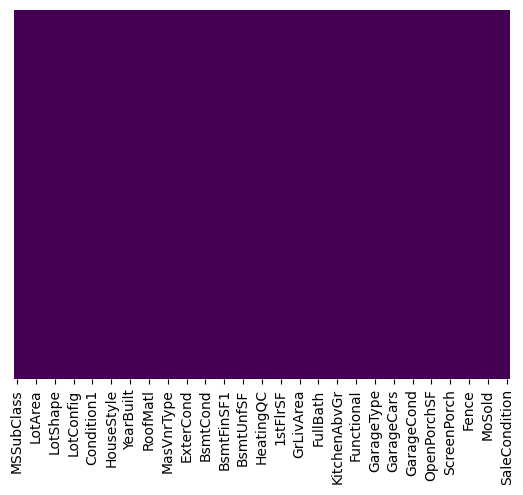

In [22]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
from sklearn.preprocessing import LabelEncoder
for col in X_train.select_dtypes(include=['object']).columns:
    encoder= LabelEncoder()
    X_train[col]= encoder.fit_transform(X_train[col])
    test_df[col]= encoder.transform(test_df[col])


In [28]:
params={
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}


In [30]:
import xgboost as xgb

model=xgb.XGBRegressor(**params, enable_categorical=True)
model.fit(X_train, y_train)
print("Training completed!")


Training completed!


In [31]:
y_pred= model.predict(test_df)
print("Predictions generated")


Predictions generated


In [32]:
submission= pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
submission.to_csv('sample_submission.csv', index=False)
print("Submission file saved")


Submission file saved
